# **Trabajo de redes bayesianas**
# *liberia bnlearn*
El objetivo: 
* Cargar dataFrame
* Aplicar analisis de dato y refinamiento de esta
* Lectura de estrcutra DAG
* Lectura y entrenamiento de parametros DAG
* Aplicacion de inferancia.

# *Cargar DataFrame*
Comnezanmos inicialmente con la carga de dataFrame, ademas de aprobechar de generar un espacio para cargar las liberias y funciones entre otras.

In [1]:
import bnlearn as bn
import matplotlib.pyplot as plt # gráficos y visualizaciones
import seaborn as sns # plt + estadisticas
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path # modificar la lista de rutas de búsqueda que el intérprete de Python utiliza para buscar módulos y paquetes.
import os # interactua con el sistema operativo
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions


../resources/dataset_a_2021v2.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv


# *Analisis de datos y Refinamiento de esta*

Podemos observar que el dataFrame existesten una gran variedad de columnas:

* Columna "e0" hasta la columna "e52": son las preguntas de la guias utilizada para apoyar el curso en donde se puede indicar que la columna fue correctamente resuelta con un 1 y no resuelta con 0, tambien podemos indicar que no todas las preguntas de ejercicios son obligatorias, pero si podemos indicar que son una ayuda indicativa sobre posible abandono del curso. 
* Columna programa: el curso introduccion a la computacion interactua con distintas carreras como por ejemplo, ingenieria civil, industrial, entre otras, en resumen podemos indicar que la columna programa, es la carrera asociada al curso de introduccion a la computacion. 
* Columna sol1: es la nota obtenida en la primera prueba del semestre con la nota de 1 a 7.

In [2]:
#df = pd.read_csv('../resources/dataset_unab_ORIGINAL SIN P1.csv')
#df = pd.read_csv('../resources/dataset_unab_P1.csv')
df = pd.read_excel(open('../resources/dataset_a_2021v2.xlsx','rb'))
df.head()

,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,...,e45,e46,e47,e48,e49,e50,e51,e52,programa,sol1
0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,UNAB22115,1.0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,UNAB22115,1.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,UNAB22115,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,UNAB22115,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,UNAB22510,1.0


En vista que la columna sol1, esta representada por notas del 1.0 hasta el 7.0, se utiliza una funcion que permita tomar la nota y crear una nueva columna en el dataFrame llamada aprobado, donde si la nota es menor a 4 es reprobada y representada con un CERO (0), si la nota es mayor a 4, se representa como aprobado, donde se utiliza un UNO (1) para la representacion correspondiente.

In [3]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )
#revisamos la existencia de la nueva columna.
print(df.columns)

Index(['e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10',
       'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e20',
       'e21', 'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 'e28', 'e29', 'e30',
       'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40',
       'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50',
       'e51', 'e52', 'programa', 'sol1', 'aprobado'],
      dtype='object')


# *Realizando analisis varios*
Inicialmente comenzamos por saber cuanta representacion de aprobados y reporbados enxisten en todo el dataFrame

Text(0.5, 1.0, 'Aprobados/Reprobados Solemne 1 del dataset')

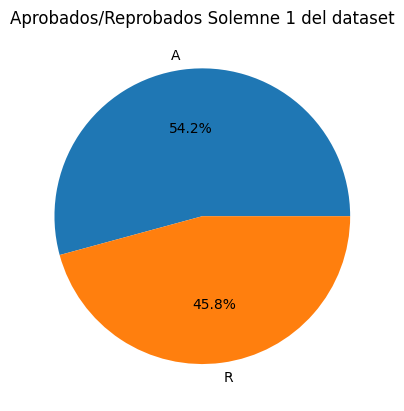

In [4]:
plt.pie(df['aprobado'].value_counts(),labels=['A','R'],autopct='%1.1f%%')
plt.title('Aprobados/Reprobados Solemne 1 del dataset')

Consultando relacion entre el programa y cantidad de alumnos por programa

In [5]:
print("Buscando el valor unico y su cardinalidad \n");
df['programa'].value_counts()

Buscando el valor unico y su cardinalidad 



UNAB12100    213
UNAB11500    185
UNAB12210    180
UNAB22115     94
UNAB21500     42
UNAB22100     41
UNAB22510     32
UNAB12510     30
UNAB21503     16
UNAB18000      2
UNAB22505      1
UNAB16507      1
UNAB35636      1
UNAB10100      1
Name: programa, dtype: int64

Realizamos un analisis sobre el programa y cuantos alumnos aprobaron la solemne 1 


In [6]:
print("Porcentaje de aprobacion solemne 1 ")

print("UNAB12100: {0:.2f}%"
    .format((df[(df['programa']=='UNAB12100') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB12100'].shape[0])*100))

print("UNAB11500: {0:.2f}%"
    .format((df[(df['programa']=='UNAB11500') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB11500'].shape[0])*100))

print("UNAB12210: {0:.2f}%"
    .format((df[(df['programa']=='UNAB12210') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB12210'].shape[0])*100))

print("UNAB22115: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22115') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22115'].shape[0])*100))

print("UNAB21500: {0:.2f}%"
    .format((df[(df['programa']=='UNAB21500') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB21500'].shape[0])*100))

print("UNAB22100: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22100') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22100'].shape[0])*100))

print("UNAB22510: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22510') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22510'].shape[0])*100))

print("UNAB21503: {0:.2f}%"
    .format((df[(df['programa']=='UNAB21503') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB21503'].shape[0])*100))

print("UNAB18000: {0:.2f}%"
    .format((df[(df['programa']=='UNAB18000') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB18000'].shape[0])*100))

print("UNAB22505: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22505') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22505'].shape[0])*100))

print("UNAB22510: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22510') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22510'].shape[0])*100))

print("UNAB16507: {0:.2f}%"
    .format((df[(df['programa']=='UNAB16507') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB16507'].shape[0])*100))

print("UNAB35636: {0:.2f}%"
    .format((df[(df['programa']=='UNAB35636') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB35636'].shape[0])*100))

print("UNAB10100: {0:.2f}%"
    .format((df[(df['programa']=='UNAB10100') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB10100'].shape[0])*100))

Porcentaje de aprobacion solemne 1 
UNAB12100: 28.64%
UNAB11500: 43.78%
UNAB12210: 65.56%
UNAB22115: 43.62%
UNAB21500: 38.10%
UNAB22100: 58.54%
UNAB22510: 34.38%
UNAB21503: 75.00%
UNAB18000: 0.00%
UNAB22505: 0.00%
UNAB22510: 34.38%
UNAB16507: 0.00%
UNAB35636: 100.00%
UNAB10100: 100.00%


Acontinuacion resolveremos las pregunta:
+ ¿Cuantos aprobados y reprobados existen?

Para ello buscamos en la columna aprobado sea igual a uno y filtramos las columnas del 0 al 53 equivalentes a la e0 hasta la e52


In [7]:
# Seleccionar solo los alumnos aprobados
aprobados = df[df["aprobado"] == 1]

# Identificar las preguntas que sí y no respondieron los alumnos aprobados
preguntas_aprobado = aprobados[aprobados.columns[0:53]]

Repetimos el proceso anterior descrito, pero ahora buscamos a los reprobados donde en la columna aprobado sea igual a cero.

In [8]:
# Seleccionar solo los alumnos aprobados
reprobados = df[df["aprobado"] == 0]

# Identificar las preguntas que sí y no respondieron los alumnos aprobados
preguntas_no_aprobados = reprobados[reprobados.columns[0:53]]

+ ¿Cuales preguntas respondieron los Aprobados?

Podemos observar que las preguntas de la guia respondidas son las siguientes:

'e0', 'e3', 'e4', 'e10', 'e17', 'e22', 'e23', 'e25', 'e26', 'e29', 'e42', 'e7', 'e13', 'e18', 'e32', 'e35', 'e1', 'e6', 'e28', 'e38', 'e44', 'e9', 'e11', 'e12', 'e21', 'e37'.

Donde la e17 fue la mas resulta de los aprobados y la e11 la menos respondida de los aprobados.


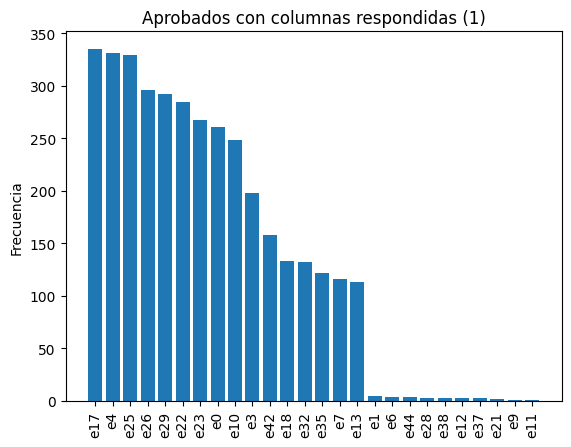

In [14]:
# Obtener las columnas donde en la línea del aprobado hay un 1
columnas_aprobados = []
for index, row in preguntas_aprobado.iterrows():
    columnas_aprobados.extend(list(preguntas_aprobado.columns[row == 1]))

# Contar la frecuencia de cada columna
frecuencia = {}
for columna in columnas_aprobados:
    if columna in frecuencia:
        frecuencia[columna] += 1
    else:
        frecuencia[columna] = 1

# Ordenar las columnas por frecuencia descendente
frecuencia = dict(sorted(frecuencia.items(), key=lambda x: x[1], reverse=True))

# Crear un gráfico de barras
plt.bar(frecuencia.keys(), frecuencia.values())
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.title('Aprobados con columnas respondidas (1)')

# Mostrar el gráfico
plt.show()

+ ¿Cuales preguntas respondieron los Reprobados?

Podemos observar que las preguntas de la guia respondidas son las siguientes:

'e0', 'e3', 'e4', 'e10', 'e17', 'e22', 'e23', 'e25', 'e26', 'e29', 'e18', 'e42', 'e7', 'e13', 'e32', 'e35', 'e6', 'e28', 'e37', 'e44', 'e1', 'e12', 'e9', 'e11', 'e21', 'e38'.

Donde la e17 fue la mas resulta de los Reprobados y la e38 la menos respondida de los Reprobados.

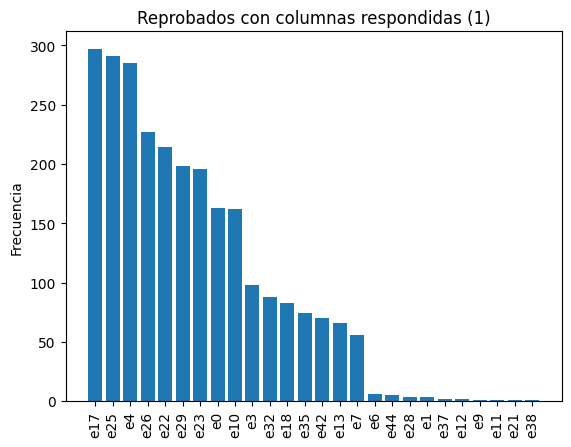

In [18]:
# Obtener las columnas donde en la línea del reprobado hay un 1
columnas_reprobados = []
for index, row in preguntas_no_aprobados.iterrows():
    columnas_reprobados.extend(list(preguntas_no_aprobados.columns[row == 1]))

# Contar la frecuencia de cada columna
frecuencia = {}
for columna in columnas_reprobados:
    if columna in frecuencia:
        frecuencia[columna] += 1
    else:
        frecuencia[columna] = 1

# Ordenar las columnas por frecuencia descendente
frecuencia = dict(sorted(frecuencia.items(), key=lambda x: x[1], reverse=True))

# Crear un gráfico de barras
plt.bar(frecuencia.keys(), frecuencia.values())
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')

# Crear un gráfico de torta
# plt.figure(figsize=(8,8))
# plt.pie(frecuencia.values(), labels=frecuencia.keys(), autopct='%1.1f%%', startangle=90)

# plt.axis('equal')
plt.title('Reprobados con columnas respondidas (1)')

# Mostrar el gráfico
plt.show()

+ ¿Cuales preguntas omitieron los Aprobados?

Podemos observar que las preguntas de la guia son las siguientes:

'e1', 'e2', 'e5', 'e6', 'e7', 'e8', 'e9', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e18', 'e19', 'e20', 'e21', 'e24', 'e27', 'e28', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'e3', 'e10', 'e22', 'e23', 'e29', 'e0', 'e4', 'e17', 'e26', 'e25'.

Donde la e2 fue la mas omitida de los Aprobados y la e17 la menos omitida de los Aprobados.

dict_keys(['e1', 'e2', 'e5', 'e6', 'e7', 'e8', 'e9', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e18', 'e19', 'e20', 'e21', 'e24', 'e27', 'e28', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'e3', 'e10', 'e22', 'e23', 'e29', 'e0', 'e4', 'e17', 'e26', 'e25'])


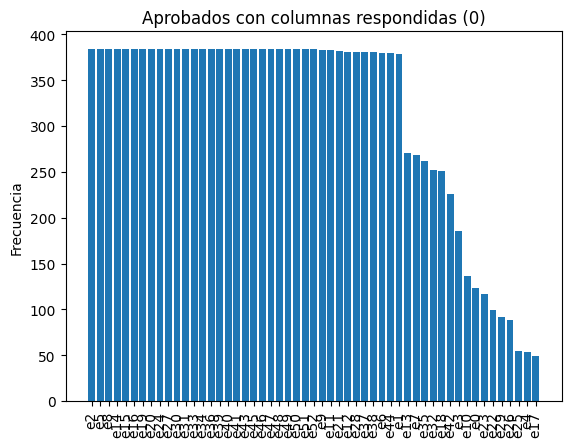

In [19]:
# Obtener las columnas donde en la línea del aprobado hay un 0
columnas_aprobados = []
for index, row in preguntas_aprobado.iterrows():
    columnas_aprobados.extend(list(preguntas_aprobado.columns[row == 0]))

# Contar la frecuencia de cada columna
frecuencia = {}
for columna in columnas_aprobados:
    if columna in frecuencia:
        frecuencia[columna] += 1
    else:
        frecuencia[columna] = 1

print(frecuencia.keys())
# Ordenar las columnas por frecuencia descendente
frecuencia = dict(sorted(frecuencia.items(), key=lambda x: x[1], reverse=True))

# Crear un gráfico de barras
plt.bar(frecuencia.keys(), frecuencia.values())
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.title('Aprobados con columnas respondidas (0)')

# Mostrar el gráfico
plt.show()

+ ¿Cuales preguntas omitieron los Reprobados?

Podemos observar que las preguntas de la guia son las siguientes:

'e1', 'e2', 'e5', 'e6', 'e7', 'e8', 'e9', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e18', 'e19', 'e20', 'e21', 'e24', 'e27', 'e28', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'e3', 'e10', 'e22', 'e4', 'e0', 'e17', 'e23', 'e25', 'e26', 'e29'.

Donde la e1 fue la mas omitida de los Reprobados y la e17 la menos omitida de los Aprobados.

dict_keys(['e1', 'e2', 'e5', 'e6', 'e7', 'e8', 'e9', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e18', 'e19', 'e20', 'e21', 'e24', 'e27', 'e28', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'e3', 'e10', 'e22', 'e4', 'e0', 'e17', 'e23', 'e25', 'e26', 'e29'])


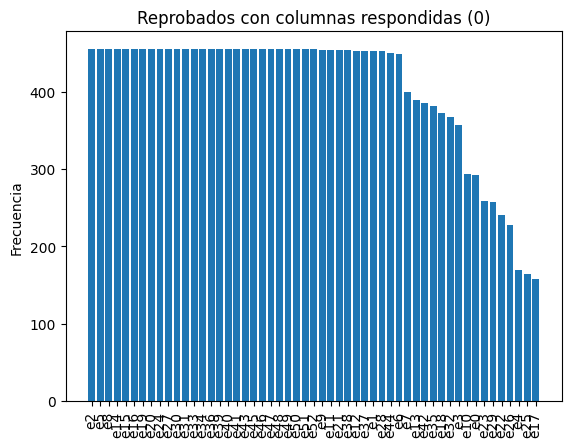

In [20]:
# Obtener las columnas donde en la línea del reprobado hay un 0
columnas_reprobados = []
for index, row in preguntas_no_aprobados.iterrows():
    columnas_reprobados.extend(list(preguntas_no_aprobados.columns[row == 0]))

# Contar la frecuencia de cada columna
frecuencia = {}
for columna in columnas_reprobados:
    if columna in frecuencia:
        frecuencia[columna] += 1
    else:
        frecuencia[columna] = 1

print(frecuencia.keys())

# Ordenar las columnas por frecuencia descendente
frecuencia = dict(sorted(frecuencia.items(), key=lambda x: x[1], reverse=True))

# Crear un gráfico de barras
plt.bar(frecuencia.keys(), frecuencia.values())
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.title('Reprobados con columnas respondidas (0)')

# Mostrar el gráfico
plt.show()

In [21]:
DAG = bn.structure_learning.fit(df)
print(DAG['adjmat'])

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
target       e0     e1     e2     e3     e4     e5     e6     e7     e8  \
source                                                                    
e0        False  False  False  False  False  False  False  False  False   
e1        False  False  False  False  False  False  False  False  False   
e2        False  False  False  False  False  False  False  False  False   
e3         True  False  False  False   True  False  False  False  False   
e4        False  False  False  False  False  False  False  False  False   
e5        False  False  False  False  False  False  False  False  False   
e6        False   True  False  False  False  False  False  False  False   
e7         True  False  False  False  False  False  False  False  False   
e8        False  False  False  False  False  False  False  False  

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


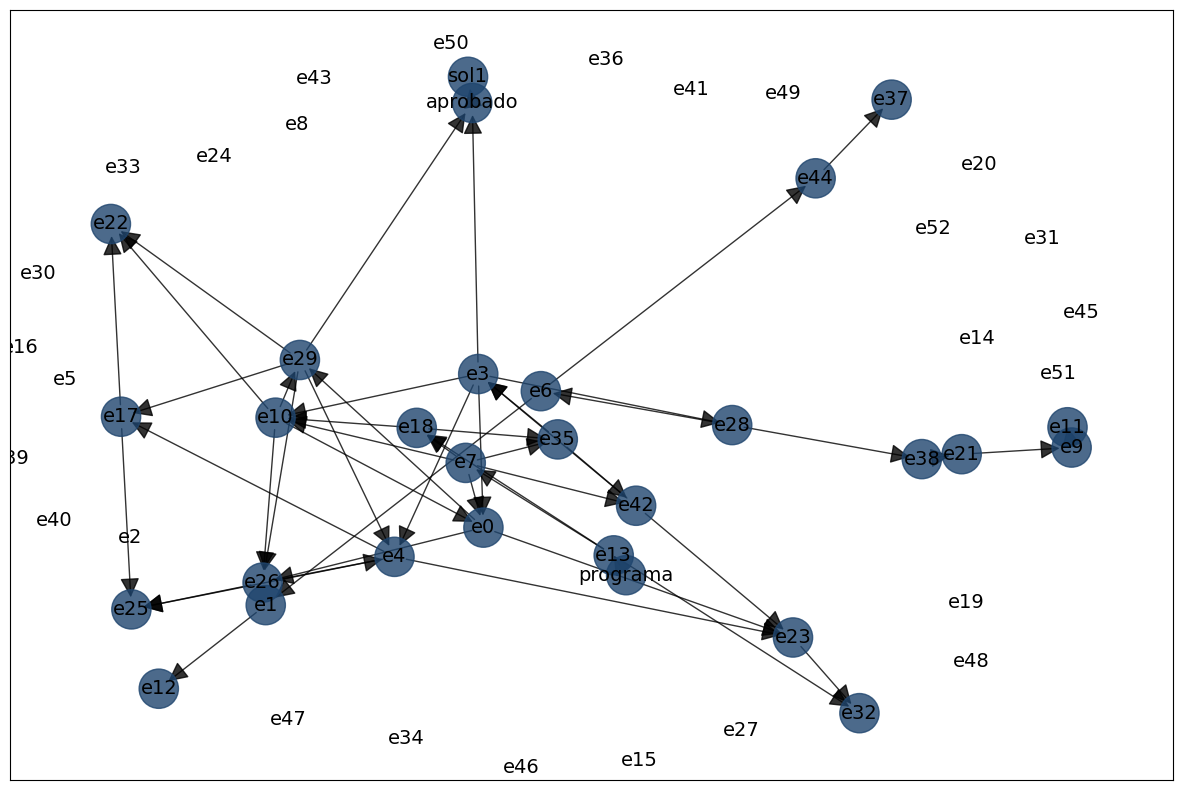

In [22]:
G = bn.plot(DAG)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


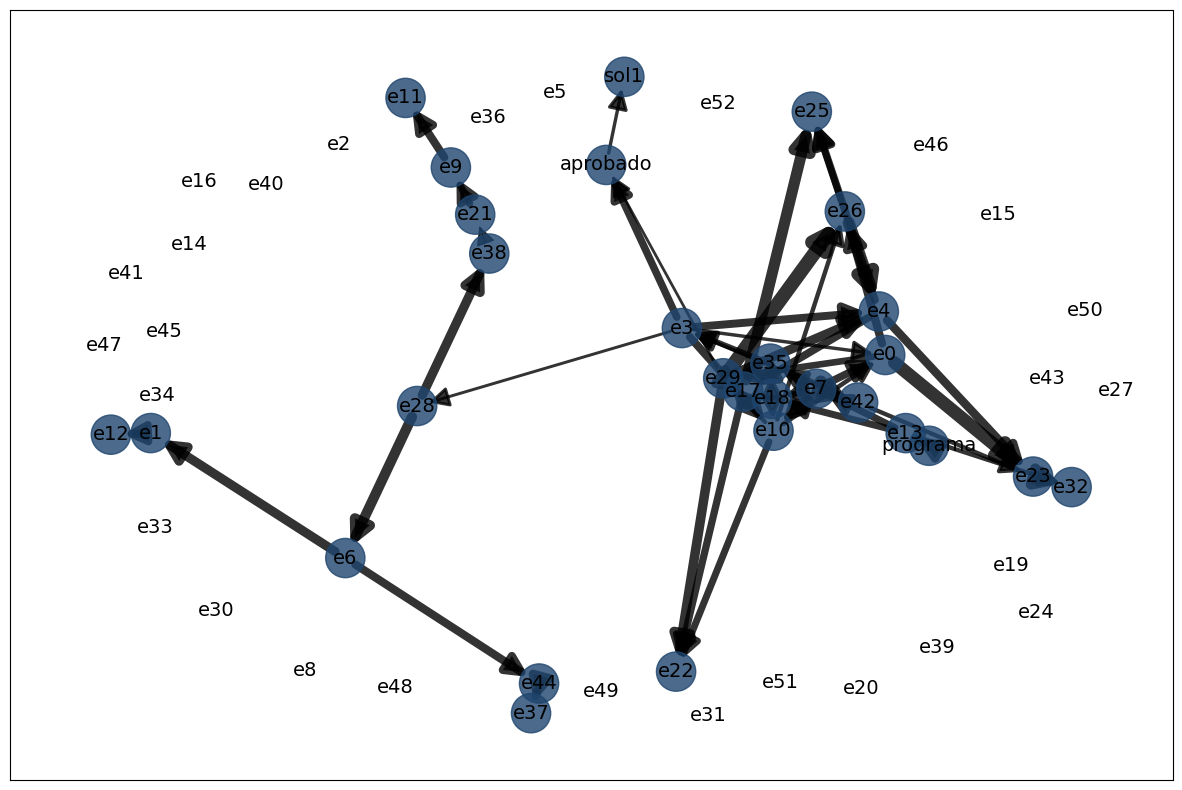

In [23]:
model = bn.structure_learning.fit(df)
# Compute edge strength with the chi_square test statistic
model = bn.independence_test(model, df)
G = bn.plot(model)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


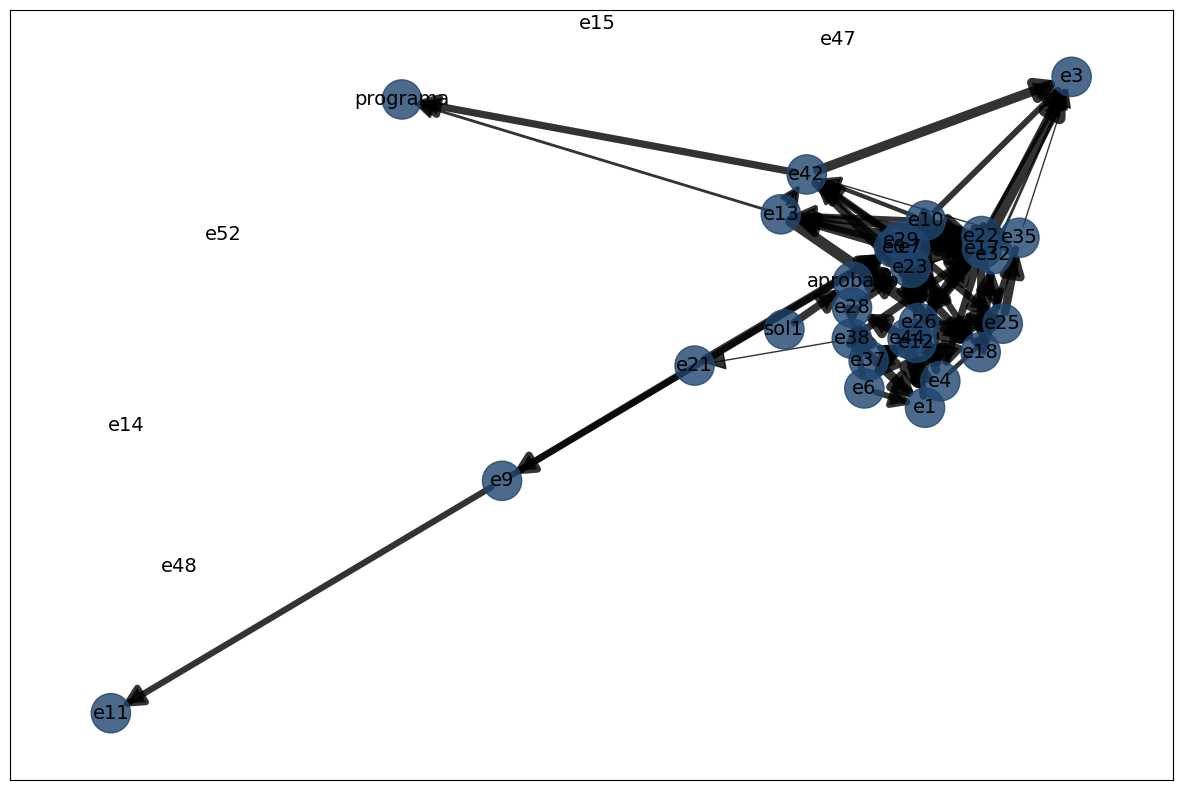

In [24]:
model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')
model_hc_k2 = bn.independence_test(model_hc_k2, df)
G = bn.plot(model_hc_k2)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


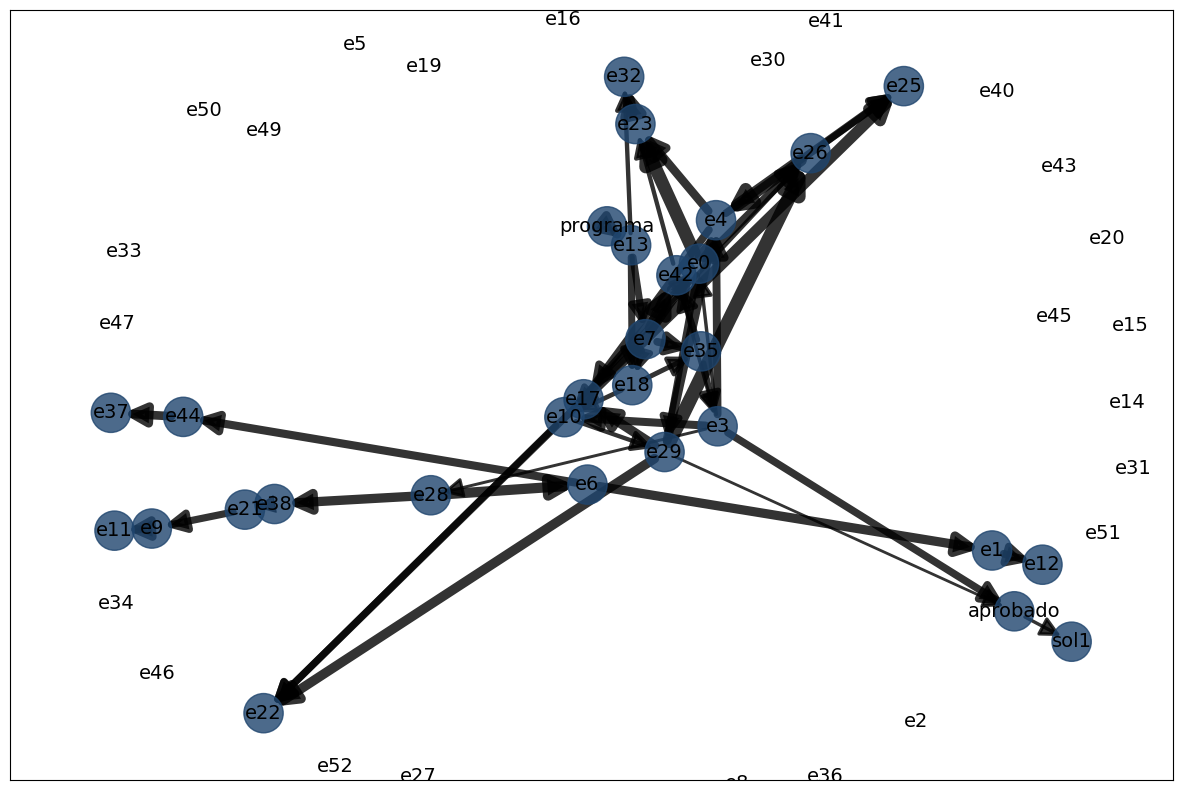

In [25]:
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_hc_bic = bn.independence_test(model_hc_bic, df)
G = bn.plot(model_hc_bic)

In [26]:
# Ajustar los parámetros de la red bayesiana
model_bayes = bn.parameter_learning.fit(model_hc_k2, df, methodtype='bayes')

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of e0:
+----------+--------------------+-----+--------------------+
| aprobado | aprobado(0)        | ... | aprobado(1)        |
+----------+--------------------+-----+--------------------+
| e21      | e21(0)             | ... | e21(1)             |
+----------+--------------------+-----+--------------------+
| e23      | e23(0)             | ... | e23(1)             |
+----------+--------------------+-----+--------------------+
| e9       | e9(0)              | ... | e9(1)              |
+----------+--------------------+-----+--------------------+
| e0(0)    | 0.8250388802488335 | ... | 0.4921259842519685 |
+----------+--------------------+-----+--------------------+
| e0(1)    | 0.1749611197511664 | ... | 0.5078740157480315 |
+----------+--------------------+-----+-------------

In [33]:
# Realizar inferencias en la red bayesiana
evidence= {
    'e0':1,
    'e1':1,
    # 'e2':0,
    'e3':1, 
    'e4':1, 
    # 'e5':0, 
    'e6':1, 
    'e7':1, 
    # 'e8':0, 
    'e9':1, 
    'e10':1,
    'e11':1, 
    'e12':1, 
    'e13':1, 
    # 'e14':0, 
    # 'e15':0, 
    # 'e16':0, 
    'e17':1, 
    'e18':1, 
    # 'e19':0, 
    # 'e20':0,
    'e21':1, 
    'e22':1, 
    'e23':1, 
    # 'e24':0, 
    'e25':1, 
    'e26':1, 
    # 'e27':0, 
    'e28':1, 
    'e29':1, 
    # 'e30':0,
    # 'e31':0, 
    'e32':1, 
    # 'e33':0, 
    # 'e34':0, 
    'e35':1, 
    # 'e36':0, 
    'e37':1, 
    'e38':1, 
    # 'e39':0, 
    # 'e40':0,
    # 'e41':0, 
    'e42':1, 
    # 'e43':0, 
    'e44':1, 
    # 'e45':0, 
    # 'e46':0, 
    # 'e47':0, 
    # 'e48':0, 
    # 'e49':0, 
    # 'e50':0,
    # 'e51':0, 
    # 'e52':0,
    'sol1':7,
}
prediccion = bn.inference.fit(model_bayes, variables=['aprobado'], evidence=evidence)
print(prediccion)


[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+------------+---------+
|    |   aprobado |       p |
+====+============+=========+
|  0 |          0 | 0.19084 |
+----+------------+---------+
|  1 |          1 | 0.80916 |
+----+------------+---------+
+-------------+-----------------+
| aprobado    |   phi(aprobado) |
+=============+=================+
| aprobado(0) |          0.1908 |
+-------------+-----------------+
| aprobado(1) |          0.8092 |
+-------------+-----------------+


In [ ]:
# # Parameter learning on the user-defined DAG and input data using Bayes
# model_bayes = bn.parameter_learning.fit(DAG, df, methodtype='bayes')

# # Print the learned CPDs
# bn.print_CPD(model_bayes)

In [ ]:
# model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')
# model_hc_bdeu = bn.independence_test(model_hc_bdeu, df)
# G = bn.plot(model_hc_bdeu)

In [ ]:
# model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')
# model_ex_bic = bn.independence_test(model_ex_bic, df)
# G = bn.plot(model_ex_bic)

In [ ]:
# model_ex_k2   = bn.structure_learning.fit(df, methodtype='ex', scoretype='k2')
# model_ex_k2 = bn.independence_test(model_ex_k2, df)
# G = bn.plot(model_ex_k2)

In [ ]:
# model_ex_bdeu = bn.structure_learning.fit(df, methodtype='ex', scoretype='bdeu')
# model_ex_bdeu = bn.independence_test(model_ex_bdeu, df)
# G = bn.plot(model_ex_bdeu)

In [ ]:
# model_cl = bn.structure_learning.fit(df, methodtype='cl', root_node='Wet_Grass')
# model_cl = bn.independence_test(model_cl, df)
# G = bn.plot(model_cl)

In [ ]:
# model_tan     = bn.structure_learning.fit(df, methodtype='tan', root_node='Wet_Grass', class_node='Rain')
# model_tan = bn.independence_test(model_tan, df)
# G = bn.plot(model_tan)